In [1]:
#hide
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
skin_type = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [4]:
dls = skin_type.dataloaders('./skin_type')

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [5]:
skin_type = skin_type.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = skin_type.dataloaders('./skin_type')

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


E:\Anaconda\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [6]:
skin_type = skin_type.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [7]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,2.662455,1.860054,0.655738,00:15


epoch,train_loss,valid_loss,error_rate,time
0,2.242721,1.748729,0.655738,00:17
1,2.061859,1.603315,0.573770,00:17
2,1.889335,1.337361,0.459016,00:16
3,1.762947,1.068748,0.393443,00:18
4,1.644944,0.870960,0.262295,00:21
5,1.539432,0.715050,0.245902,00:18
6,1.426674,0.596278,0.163934,00:21
7,1.322295,0.516829,0.180328,00:20
8,1.207688,0.399883,0.147541,00:19
9,1.125480,0.307410,0.147541,00:19


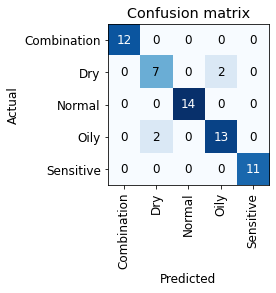

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [9]:
learn.export()

In [10]:
path = Path()